# Práctica 1 Actividad III
## Implemente scripts que resuelvan los siguiente:

1. Abrir los archivos adquiridos en la Práctica 0 y desplegar un segmento de señal determinado

In [21]:
"""Importación de librerías necesarias para la práctica"""
import numpy as np
import matplotlib.pyplot as plt
import os

In [22]:
"""Configuración del path de datos"""
directorio = os.path.abspath('\..\data')
print(directorio)

C:\Users\Alex XD\Desktop\UamI\11vo_Tri\Metodos Computacionales\MCIB-19-P\data


In [23]:
"""Apertura de archivos adquiridos en Práctica 0"""
#Lista con nombre de los archivos a cargar
archivos = ['A1','A2','A2_1','A2_2','A2_3','A2_4','A2_5','A2_6','A3_1','A3_2','A3_3','A3_4','A3_5']

#Ciclo que permite abrir los archivos y almacenarlos en una variable cuyo nombre sea el mismo que el archivo
for i in archivos:
    temp = np.loadtxt(directorio+'\\'+i+'.csv',delimiter=',',dtype = 'str') #Se carga el archivo
    exec('%s = temp[4:,:5].astype(''float'')'%i) #Recortw para eliminar los encabezados y las columnas innecesarias
    head = temp[0:2,:5] #Variable que recupera los encabezados y las unidades de las señales

Los archivos están compuestos por 5 señales identificadas por un número:
	0. Saturación de oxygeno
	1. EMG
	2. ECG
	3. Onda de respiración
	4. Onda de pulso
Ingrese el número de señal que desea observar (de 0 a 4 )	1


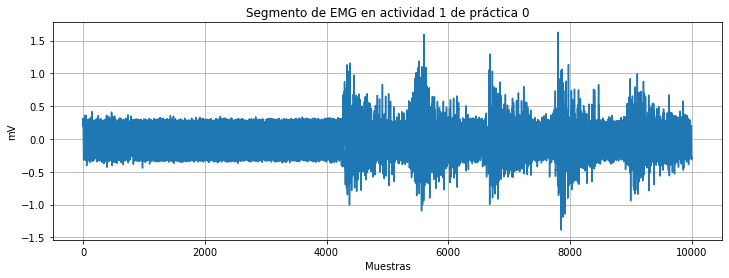

In [26]:
"""Gráfica de un segmento de señal seleccionado por el usuario"""
#Menú para selección de señal a observar del archivo A2_1
print('Los archivos están compuestos por 5 señales identificadas por un número:')
print('\t0. Saturación de oxygeno\n\t1. EMG\n\t2. ECG\n\t3. Onda de respiración\n\t4. Onda de pulso')
ch = input('Ingrese el número de señal que desea observar (de 0 a 4 )\t')
ch = int(ch)

#Gráfica de segmento de señal seleccionada
plt.figure(figsize=(12,4))
plt.plot(A2_1[45000:55000,ch])
plt.title('Segmento de %s en actividad 1 de práctica 0'%head[0,ch])
plt.ylabel('%s'%head[1,ch])
plt.xlabel('Muestras')
plt.grid(True)
plt.show()

2. Generar una onda cuadrada aproximando hasta el k-ésimo término, utilizando exclusivamente operaciones con matrices y funciones matriciales de numpy, en otras palabras, no está permitido utilizar ningún tipo de ciclos. Graficar el resultado. Asuma una frecuencia de muestreo de 300 Hz y una frecuencia fundamental de 5 Hz.

In [27]:
"""Parámetros para creación de onda cuadrada"""
sr = 300 #Frecuencia de muestreo
f = 5 #Frecuencia fundamental
L = 1 #Duración de la señal en segundos
t = np.linspace(0,L,L*sr) #Eje de tiempo
t = t[:,np.newaxis] #Acondicionamiento del eje de tiempo

Ingrese la cantidad de armónicos con los que desea aproximar la onda cuadrada	10


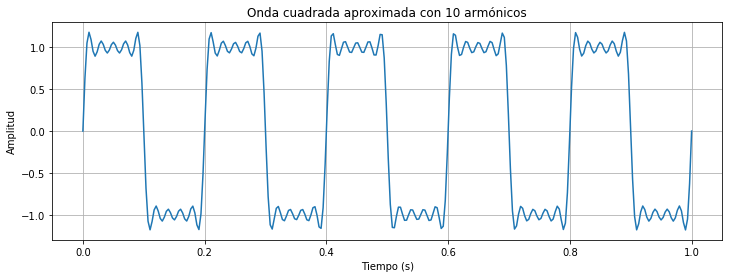

In [35]:
"""Generación de onda cuadrada"""
#Selección de número de armónicos
N = input('Ingrese la cantidad de armónicos con los que desea aproximar la onda cuadrada\t')
N = int(N)
N = N*2

#Vector con los valores k de la serie de Fourier
k = np.arange(1,N*2,2)[np.newaxis]

#Vector con los argumentos de cada señal senoidal
teta = t*k*f*2*np.pi

#Matriz con senoidales que conformarán la serie de Fourier
sen = np.sin(teta)
sen = (1/k) * sen
sen = sen.sum(axis = 1) #Suma de senoidales
sen =(4/np.pi)*(sen) 

#Gráfica de onda resultante
plt.figure(figsize=(12,4))
plt.plot(t,sen)
plt.grid(True)
plt.title('Onda cuadrada aproximada con %i armónicos'%N)
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.show()

3. Repita el ejercicio anterior, pero considerando una onda triangular.

Ingrese la cantidad de armónicos con los que desea aproximar la onda triangular	20


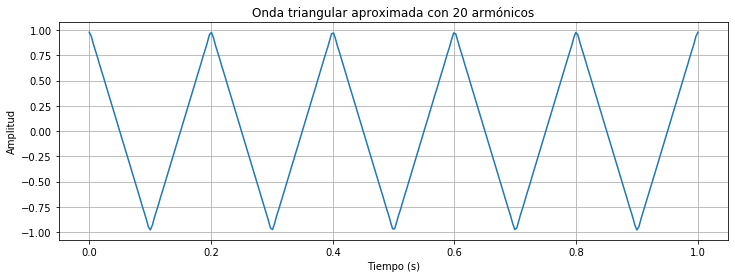

In [39]:
"""Generación de onda triangular"""
#Selección de número de armónicos
N = input('Ingrese la cantidad de armónicos con los que desea aproximar la onda triangular\t')
N = int(N)
N = N*2

#Vector con los valores k de la serie de Fourier
k = np.arange(1,N*2,2)[np.newaxis]

#Vector con los argumentos de cada señal senoidal
teta = t*k*f*2*np.pi

#Matriz con senoidales que conformarán la serie de Fourier
sen = np.cos(teta)
sen = (1/k**2) * sen
sen = sen.sum(axis = 1) #Suma de senoidales
sen =(8/np.pi**2)*(sen) 

#Gráfica de onda resultante
plt.figure(figsize=(12,4))
plt.plot(t,sen)
plt.grid(True)
plt.title('Onda triangular aproximada con %i armónicos'%N)
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.show()